Group-3_Project_Effectiveness of Public Transportation


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
import camelot

In [4]:
def ridership_trend_us(file2):
    """    
    Arguments:
    file {'2019-APTA-Fact-Book-Appendix-A.xlsx'}   
    
    Returns:
        Returns the plot of Changing transit ridership for major modes of public transport
    """

    assert isinstance(file2,str)
    df = pd.read_excel(file2, sheet_name= '1', skiprows = 4)
    df = df.iloc[10:106]  # For years 1922- 2017
    df = df.rename(columns = {'Unnamed: 4':'Bus','Unnamed: 17':'Surface Rail', 'Ferryboat':'FerryBoat * (100)'})

    #%%
    df = df.rename(columns = {'Unnamed: 4':'Bus','Trolleybus (a)':'TrolleyBus * (10)','Unnamed: 13':'Region Railroad * (10)','Unnamed: 17':'Surface Rail * (10)', 'Ferryboat':'FerryBoat * (100)'})
    df['Bus'] = pd.to_numeric(df.Bus.astype(str).str.replace(',',''), errors='coerce').fillna(float(5413)).astype(int)

    #%%
    df_1= pd.DataFrame({
        'Bus': list(df['Bus'].values),
        'Heavy Rail': list(df['Heavy Rail'].values),
        'Light Rail' : list(df['Surface Rail'].values)
    }, index = df['Year'].values
    )
    #%%
    # Using Matplotlib

#     df_1.plot.area()
#     plt.xlabel('Years')
#     plt.ylabel('Unlinked Trips (in millions)')
#     plt.title('Changing transit ridership for major modes of public transport')
#     ax = plt.gca()
#     ax.grid(which='major', axis='y', linestyle='--', linewidth = '0.5')

#     plt.tight_layout()
#     plt.show()

    #%%
    # Using Plotly

    import plotly
    import plotly.graph_objs as go


    x_1 = list(df['Year'].values)
    y_1 = list(df['Bus'].values)
    y_2 = list(df['Heavy Rail'].values)
    y_3 = list(df['Surface Rail'].values)

    #%%
    plotly.offline.init_notebook_mode(connected=True)

    trace0 = dict(x=x_1,y= y_1,hoverinfo='x+y',mode='lines',line=dict(width=0.5,color='rgb(204, 102, 10)'),stackgroup='one',name = 'Bus')
    trace1 = dict(x=x_1,y=y_2, hoverinfo='x+y',mode='lines',line=dict(width=0.5,color='rgb(102, 255, 102)'),stackgroup='one',name = 'Heavy Rail')
    trace2 = dict(x=x_1,y=y_3, hoverinfo='x+y',mode='lines',line=dict(width=0.5,color='rgb(51, 153, 255)'),stackgroup='one',name = 'Light Rail')

    data = [trace0, trace1, trace2]

    layout = go.Layout(
        legend=dict(
            x=0,
            y=1,
            traceorder='normal',
            font=dict(
                family='sans-serif',
                size=12,
                color='#000'
            ),
            bgcolor='#E2E2E2',
            bordercolor='#FFFFFF',
            borderwidth=2
        ),
        title = 'Ridership by Mode across U.S.',
        xaxis = dict(title = 'Years'),
        yaxis = dict(title = 'Unlinked Trips (in millions)')
    )

    fig = dict(data=data, layout = layout)
    return plotly.offline.iplot(fig, filename = '1.html')


# #%%
# df_2 = pd.DataFrame({
#     'Year':list(df['Year'].values),
#     'Total Ridership (in millions)':list(df['All Modes Reported Total (Parts A and B)'].values)
# })

# #df_2.to_csv('ridership_US.csv')



In [5]:
file2 = '2019-APTA-Fact-Book-Appendix-A.xlsx'

ridership_trend_us(file2)
display(HTML('1.html'))

NameError: name 'HTML' is not defined

In [29]:
def plot_passenger_miles_us(file2):
    """
    Arguments:
        file {'2019-APTA-Fact-Book-Appendix-A.xlsx'}    
    Returns:
        Returns the US Passenger miles over the years plot
    """

    assert isinstance(file2,str)
    df = pd.read_excel(file2, sheet_name= '3', skiprows = 4)
    df = df.iloc[1:42]  # For years 1977- 2017
    df = df.rename(columns = {'Unnamed: 4':'Bus','Trolleybus (a)':'TrolleyBus','Unnamed: 13':'Region_Railroad','Unnamed: 17':'Surface Rail', 'Ferryboat':'FerryBoat'})
    df['Region Railroad'] = pd.to_numeric(df.Region_Railroad.astype(str).str.replace('---','0'),errors = 'coerce').astype(int)
    df['FerryBoat'] = pd.to_numeric(df.FerryBoat.astype(str).str.replace('---','0'),errors = 'coerce').astype(int)
    ## Clean the Bus column
    df['Bus'] = pd.to_numeric(df.Bus.astype(str).str.replace(',',''), errors='coerce').fillna(float(20976)).astype(int)
    ## Need to change fillna value every sheet

    #%%
    x_1 = list(df['Year'].values)
    y_1 = list(df['TrolleyBus'].values)
    y_2 = list(df['Region_Railroad'].values)
    y_3 = list(df['Surface Rail'].values)
    y_4 = list(df['FerryBoat'].values)
    y_5 = list(df['Bus'].values)
    y_6 = list(df['Heavy Rail'].values)

    import plotly
    import plotly.graph_objs as go

    plotly.offline.init_notebook_mode(connected=True)

    trace0 = go.Scatter(x=x_1,y= y_1,mode = 'lines+markers',name = 'TrolleyBus')
    trace1 = go.Scatter(x=x_1,y= y_2,mode = 'lines+markers',name = 'Region_Railroad')
    trace2 = go.Scatter(x=x_1,y= y_3,mode = 'lines+markers',name = 'Surface Rail')
    trace3 = go.Scatter(x=x_1,y= y_4,mode = 'lines+markers',name = 'FerryBoat')
    trace4 = go.Scatter(x=x_1,y= y_5,mode = 'lines+markers',name = 'Bus')
    trace5 = go.Scatter(x=x_1,y= y_6,mode = 'lines+markers',name = 'Heavy Rail')

    data = [trace0, trace1, trace2, trace3, trace4, trace5]

    # Edit the layout
    layout = go.Layout(
        legend=dict(
            x=0,
            y=0.8,
            traceorder='normal',
            font=dict(
                family='sans-serif',
                size=12,
                color='#000'
            ),
            bgcolor='#E2E2E2',
            bordercolor='#FFFFFF',
            borderwidth=2
        ),
        title = 'Passenger Miles by Mode across U.S.',
        xaxis = dict(title = 'Years'),
        yaxis = dict(title = 'Passenger Miles (in millions)'),
        yaxis2 = dict(title = 'Passenger Miles (in millions)', overlaying='y',side='right')

    )
    fig = go.Figure(data=data, layout=layout)
    return plotly.offline.iplot(fig)

In [30]:
plot_passenger_miles_us(file2)

In [31]:
def emp_compute_plots(file1):
    """
    Arguments:
        file {'2019-APTA-Fact-Book-Appendix-A.xlsx'}
    
    Returns:
        Return the employee compensation plots

    """
    assert isinstance(file1,str)
    df = pd.read_excel(file1, sheet_name= '20', skiprows = 3)
    df = df.iloc[44:87]  # For years 1975- 2017
    df['Year'] = pd.to_numeric(df.Year.astype(str).str.replace(',',''), errors='coerce').fillna(float(1984)).astype(int)
    df['Average'] = df['Total Compensation (Millions of Dollars)'].values/df['Number of Employees (Persons) (a)'].values
    x_1 = list(df['Year'].values)
    y_1 = list(df['Number of Employees (Persons) (a)'].values)
    y_2 = list(df['Total Compensation (Millions of Dollars)'].values/100)
    y_3 = list(df['Average'].values*1000)

    import plotly
    import plotly.graph_objs as go

    plotly.offline.init_notebook_mode(connected=True)

    trace0 = go.Scatter(x=x_1,y= y_1,mode = 'lines+markers',name = 'Number of employees')
    trace1 = go.Scatter(x=x_1,y= y_2,yaxis = 'y2', mode = 'lines+markers',name = 'Total Compensation (in ten million dollars)')
    trace2 = go.Scatter(x=x_1,y= y_3, yaxis = 'y2',mode = 'lines+markers',name = 'Average compensation per employee (in thousand of dollars)')

    data = [trace0, trace1, trace2]

    # Edit the layout
    layout = go.Layout(
        legend=dict(
            x=0,
            y=1,
            traceorder='normal',
            font=dict(
                family='sans-serif',
                size=12,
                color='#000'
            ),
            bgcolor='#E2E2E2',
            bordercolor='#FFFFFF',
            borderwidth=2
        ),
        title = 'Employee Compensation in Public Transport',
        xaxis = dict(title = 'Years'),
        yaxis = dict(title = 'Number of Employees'),
        yaxis2 = dict(title = 'Employee Compensation (in thousand of dollars)', overlaying='y',side='right')
    )

    fig = go.Figure(data=data, layout=layout)
    return plotly.offline.iplot(fig)

In [32]:
emp_compute_plots(file2)

In [43]:
def plot_hkcorrelation(file):
    """
    Arguments:
        file {'table11.xlsx'}
    
    Returns:
        Returns the HK Ridership vs Traffic Accidents correlation plot
    """
    assert isinstance(file,str)
    df_2= pd.read_excel(file, skiprows = 8)
    df_2 = df_2.iloc[4:15]  # For years 2007- 2017
    df_2 = df_2.rename(columns = {'Unnamed: 2':'Years','交通乘客人次 (1) (3) (4) ':'Avg. daily ridership',
    'Casualties Involved in Road Accidents (1)':'Killed','Unnamed: 20':'Injured', 'Unnamed: 22':'Killed1','Unnamed: 23':'Injured1'})

    #%%
    df_new2 = pd.DataFrame({'Annual Ridership (in thousands)': list(df_2['Avg. daily ridership'].values*365/1000),
                            'Traffic Accidents': list(((df_2['Killed1'].values)+ df_2['Injured1'].values)*7500000/1000)
                        }, index = None)  ## HK population is taken as 7.5 million

    df_new2 = df_new2.set_index(df_2['Years'].values)
    return df_new2

def create_correlation_plot(df):
    """Create seaborn correlation plot for input data frame.

    Arguments:
        df {pd Dataframe} -- Dataframe with index as years and column1=data1 and column2=data2.
    """
    assert isinstance(df,pd.DataFrame)
    xdata = df.iloc[:, 0]
    ydata = df.iloc[:, 1]
    plt.clf
    plt.figure(figsize=(7, 7))
    sns.regplot(xdata, ydata, marker='o', data=df.index)
    plt.title(f'{df.columns[0]} vs. {df.columns[1]}', color='k')
    plt.xlabel(f'{df.columns[0]}', color='k')
    plt.ylabel(f'{df.columns[1]}', color='k')
    plt.grid(True)
    plt.xticks(color='k')
    plt.yticks(color='k')
    plt.show()
    plt.savefig(f'corr{df.columns[0][0]}v{df.columns[1][0]}.jpg')



<IPython.core.display.Javascript object>


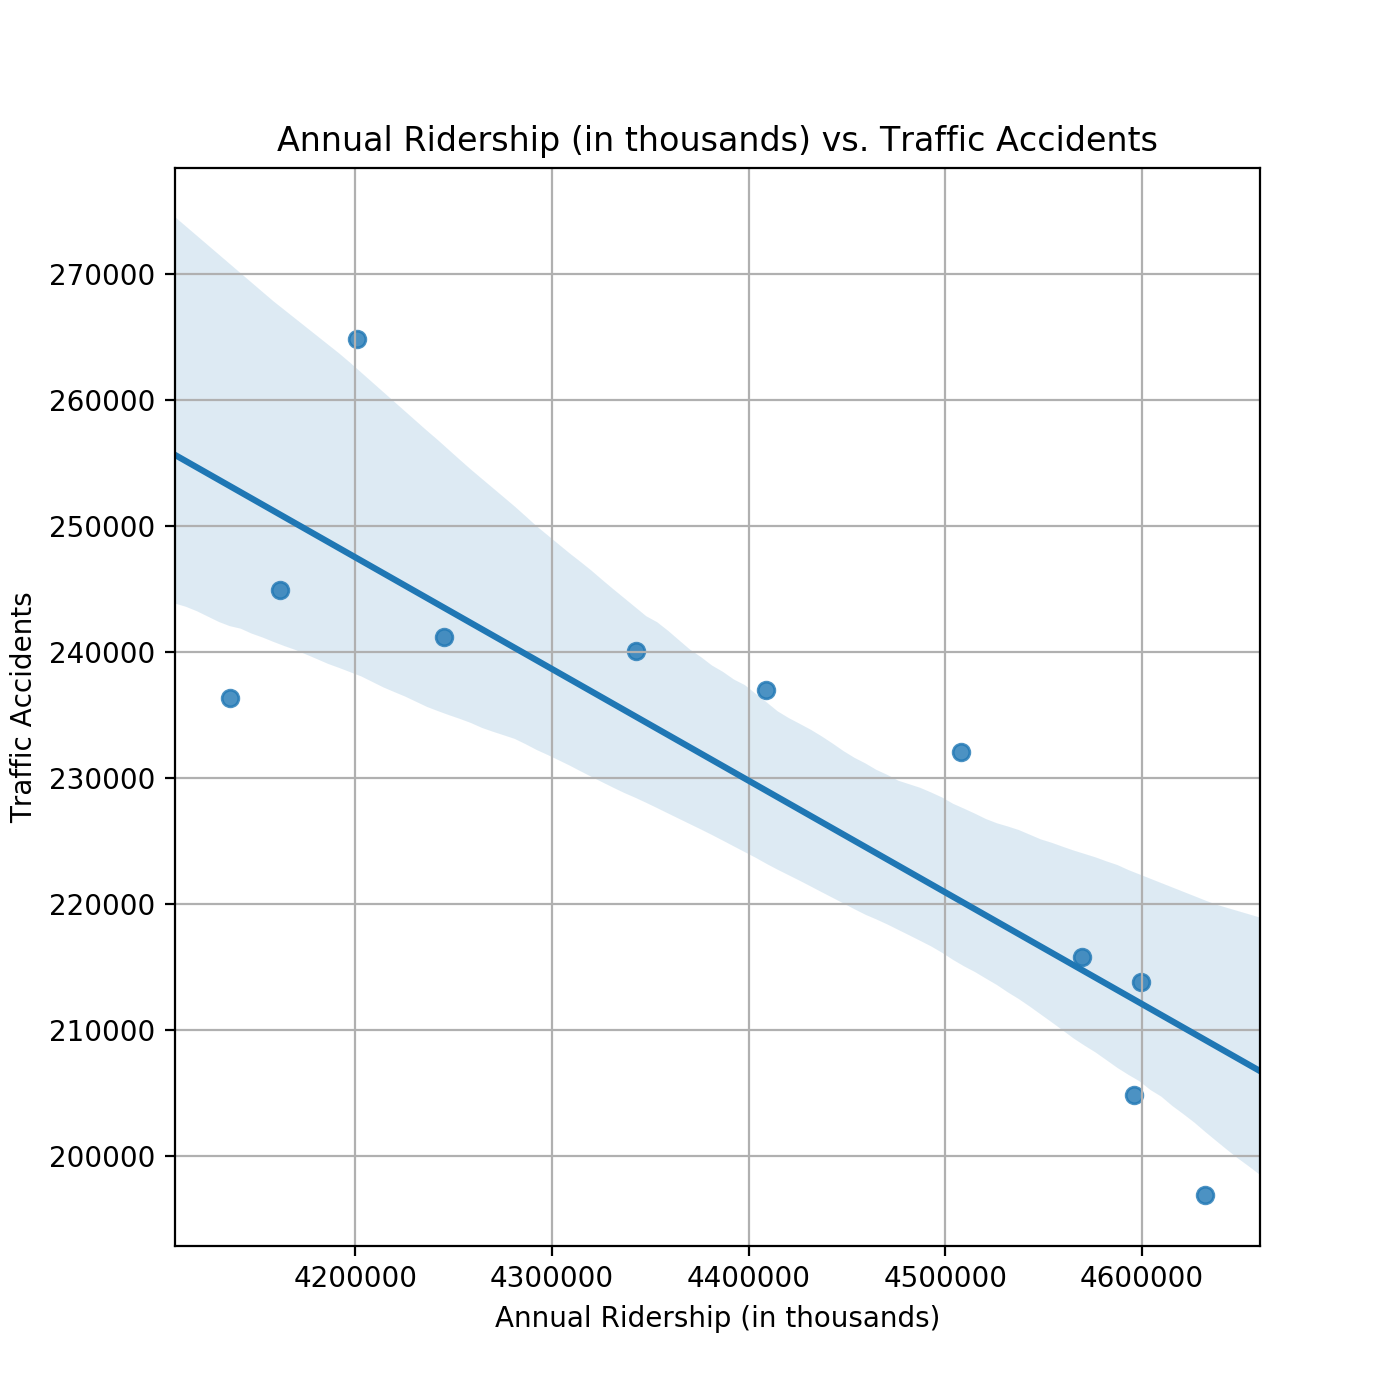

In [44]:
file3 = 'table11.xls'

a = plot_hkcorrelation(file3)
create_correlation_plot(a)

In [48]:
def ridership_elec_consumption_corr_hk_plot(table):
    """
    Arguments:
    file {'abc-page-17-table-1.csv'}   
    
    Returns:
        Returns the electricity consumption and ridership data in HK in form of a dataframe which 
        from which correlation plot can be obtained.
    """
    assert isinstance(table,pd.Series)
    # a = list(table.columns[1:11].values)
    df = pd.DataFrame({'Years':table.index[1:], 'Electricity consumption (in kWh)':table.values[1:]})

    df['Electricity consumption (in kWh)'] = df['Electricity consumption (in kWh)'].str.replace(',', '')
    df['Electricity consumption (in kWh)'] = df['Electricity consumption (in kWh)'].astype(int)

    #%%
    ##Total ridership in HK from 2007-2017

    file = 'table11.xls'
    df_2= pd.read_excel(file, skiprows = 8)
    df_2 = df_2.iloc[5:15]  # For years 2007- 2017
    df_2 = df_2.rename(columns = {'Unnamed: 2':'Years','交通乘客人次 (1) (3) (4) ':'Avg. daily ridership',
    'Casualties Involved in Road Accidents (1)':'Killed','Unnamed: 20':'Injured', 'Unnamed: 22':'Killed1','Unnamed: 23':'Injured1'})


    #%%
    df_new2 = pd.DataFrame({'Electricity consumption (in kWh)': list(df['Electricity consumption (in kWh)'].values),
                            'Annual Ridership (in thousands)': list(((df_2['Avg. daily ridership'].values*365/1000)))
                        }, index = None)  ## HK population is taken as 7.5 million

    df_new2 = df_new2.set_index(df['Years'].values)
    return df_new2

<IPython.core.display.Javascript object>


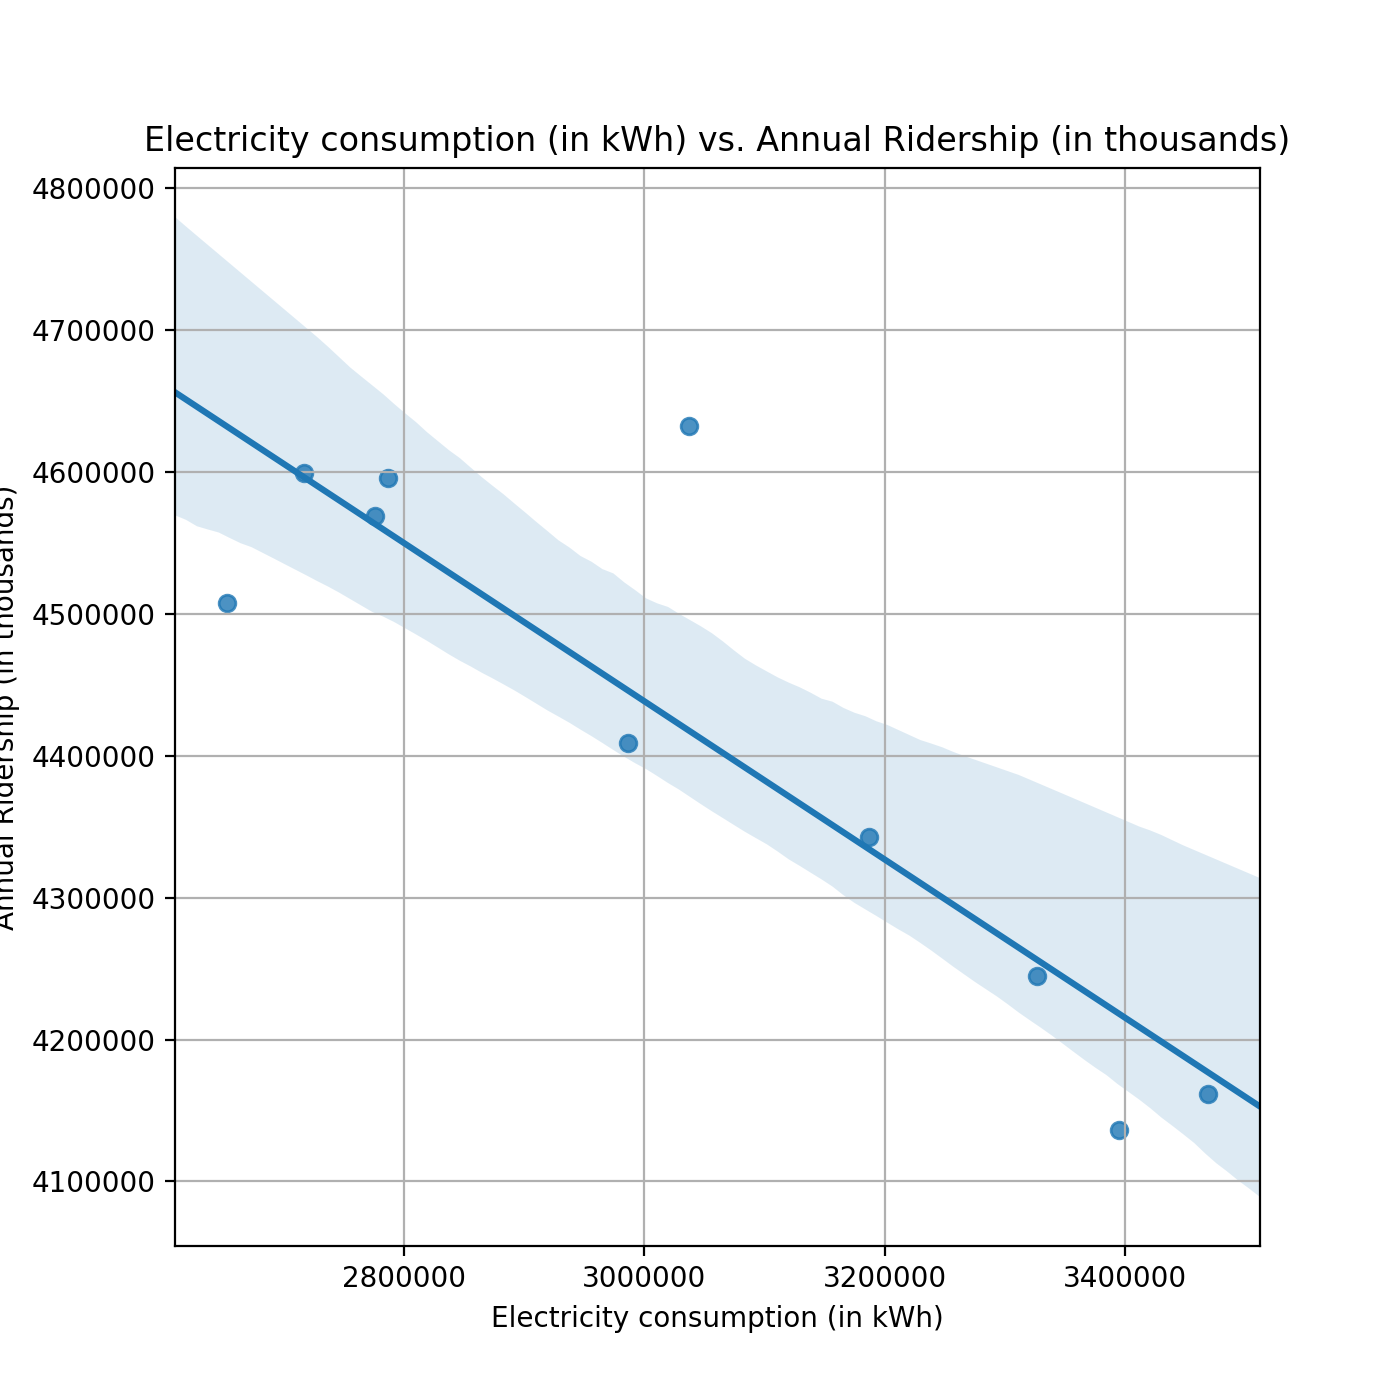

/Users/rajatsethi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



In [50]:
tables = camelot.read_pdf('123.pdf', pages = '17')     
tables.export('abc.csv', f='csv', compress=False)
table = pd.read_csv('abc-page-17-table-1.csv')
# print(table)
table = table.iloc[0]
b = ridership_elec_consumption_corr_hk_plot(table)
create_correlation_plot(b)

In [53]:
def plot_nyvshk_accidents(f,file3):
    """
    
    Arguments:
        f {'NY_crashes.csv'}
        file1 {'table11.xls'}
    
    Returns:
        Returns the NY vs HK Traffic Accidents plot
    """

    assert isinstance(file3,str)
    assert isinstance(f,str)
    import plotly
    import plotly.graph_objs as go

    df_2= pd.read_excel(file1, skiprows = 8)
    df_2 = df_2.iloc[6:15]  # For years 2009- 2017
    df_2 = df_2.rename(columns = {'Unnamed: 2':'Years','交通乘客人次 (1) (3) (4) ':'Avg. daily ridership',
    'Casualties Involved in Road Accidents (1)':'Killed','Unnamed: 20':'Injured', 'Unnamed: 22':'Killed1','Unnamed: 23':'Injured1'})
    df_new2 = pd.DataFrame({'Annual Ridership (in thousands)': list(df_2['Avg. daily ridership'].values*365/1000),
                        'Traffic Accidents': list(((df_2['Killed1'].values)+ df_2['Injured1'].values)*7500000/1000)
                    }, index = None)  ## HK population is taken as 7.5 million

    df_new2 = df_new2.set_index(df_2['Years'].values)

    df_a = pd.read_csv(f)
    df_ny = df_a.iloc[0:9]
    x1 = list(df_ny['YEAR'].values)
    y1 = list(df_ny['Total'].values)
    y11=[]
    for i in y1:
        y11.append(int(i))
    y1 = y11
    y2 = list(df_new2['Traffic Accidents'].values)
    s_1 = []
    s_2 = []
    for i in range(len(y1)-1):
        s_1.append(100*((y1[i+1] - y1[i])/y1[i]))
        s_2.append(100*((y2[i+1] - y2[i])/y2[i]))

    yr = []
    for i in range(len(x1)-1):
        yr.append(x1[i+1])
    trace0 = go.Bar(x = yr,y = s_1, name = 'NY',marker = dict(color = '#c9d9de'))
    trace1 = go.Bar(x = yr,y = s_2, name = 'HK',marker = dict(color = '#718dbf'))
    data = [trace0,trace1]
    layout_1 = dict(title = 'Percentage Change in # of Accidents',
                    xaxis = dict(title = 'Years'),
                    yaxis = dict(title = '# of Accidents change in %')
                    )
    fig = go.Figure(data = data, layout = layout_1)
    return plotly.offline.iplot(fig)

In [54]:
f = 'NY_crashes.csv'
file3 = 'table11.xls'
plot_nyvshk_accidents(f,file3)

In [58]:
file = 'NY.csv'
df = pd.read_csv(file)
df = df.iloc[7:18]
df_new = pd.read_csv('a.csv')

# df = df.iloc[0:10]
#%%
file1 = 'table21.xls'
df1 = pd.read_excel(file1, sheet_name = 0, skiprows = 9)
df1 = df1.iloc[0:5]  
df1 = df1.rename(columns = {'Unnamed: 0':'Years','Unnamed: 10':'sum1','Unnamed: 15':'sum2'})
df1['Total'] = df1['sum1'].values*1000 + df1['sum2'].values*1000
df1_new = pd.read_csv('b.csv')

#%%
# Plot in plotly

import plotly
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)

countries = ['NY', 'Hong Kong']
# fill_colors = ['#66c2a5', '#fc8d62']

x = list(df_new['Year'].values)
y_1 = list(np.array(['HK','HK','HK','HK','HK','HK','HK','HK','HK','HK']))
y_2 = list(np.array(['NY','NY','NY','NY','NY','NY','NY','NY','NY','NY']))
z_1 = list(df_new['Unlinked Passenger Trips'].values/1000000)
z_2 = list(df1_new['Total'].values/1000000)


data1 = [(dict(type = 'scatter3d', x=x,y= y_1, z = z_1, mode = 'lines',name = '',surfaceaxis = 1,surfacecolor = '#66c2a5', )),(dict(type = 'scatter3d', x=x,y= y_2, z = z_2, mode = 'lines',name = '',surfaceaxis = 1,surfacecolor = '#fc8d62'))]
# trace1 = go.Scatter3d(x=x_1,y= z,mode = 'lines',name = 'Passenger Trips')
# data1 = [trace0]
    
# data.append(dict(
#     type='scatter3d',
#     mode='lines',
#     x=years + years[::-1] + [years[0]],  # year loop: in incr. order then in decr. order then years[0]
#     y=country_coords * 2 + [country_coords[0]],
#     z=pop + zeros + [pop[0]],
#     name='',
#     surfaceaxis=1, # add a surface axis ('1' refers to axes[1] i.e. the y-axis)
#     surfacecolor=fill_color,
#     line=dict(
#         color='black',
#         width=4
#     ),
# ))

layout = go.Layout(
    legend=dict(
        x=0,
        y=1,
        traceorder='normal',
        # layout = dict(title = 'Unlinked Passenger Trips by Mode across U.S.',
        #       xaxis = dict(title = 'Years'),
        #       yaxis = dict(title = 'Unlinked Passenger Trips by Mode (in millions)'),
        #       ),
        font=dict(
            family='sans-serif',
            size=12,
            color='#000'
        ),
        bgcolor='#E2E2E2',
        bordercolor='#FFFFFF',
        borderwidth=1
    ),
    title = 'Ridership Comparison',
    showlegend=False,
    scene=dict(
        xaxis=dict(title='Years', tickmode='linear',ticks='outside',tickcolor='#000'),
        yaxis=dict(title='Cities'),
        zaxis=dict(title='Unlinked Passenger Trips',tickmode='linear',ticks='outside',tick0=3000,dtick=500,tickcolor='#000'),
        camera=dict(
            eye=dict(x=-1.7, y=-1.7, z=0.5)
        )
    )
)

fig = dict(data=data1, layout=layout)

# IPython notebook
# py.iplot(fig, filename='filled-3d-lines')

plotly.offline.iplot(fig, filename='3dplot_rajat.html')